# 와인 데이터에 대한 다항 분류

#### 와인 데이터 불러오기 
* 12개의 속성으로 구성 
* 이중 와인의 품질은 0~10까지 숫자로 구분되기 때문에 다항 분류로 처리 가능

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 인터넷에서 데이터 불러오기 
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

print(red.head())
print(white.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#### 와인 데이터세트 합치기 

In [3]:
# 두 데이터프레임을 합친 새로운 데이터프레임 생성 
wine = pd.concat([red, white])

print(wine.head())

# 통계 정보 확인 
print(wine.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#### 품질 데이터 확인 
* describe() : 통계 정보 
* value_counts() : 항목 갯수 

In [4]:
print(wine['quality'].describe(), '\n')     
print(wine['quality'].value_counts())       

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64 

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


####  와인의 품질에 대한 히스토그램
* plt.hist() 로 작성 
* bins=7 : 몇 개의 바구니로 구분할 것인가. 
* rwidth=0.8 : 1.0일 경우, 꽉 채움 작아질수록 간격이 생김

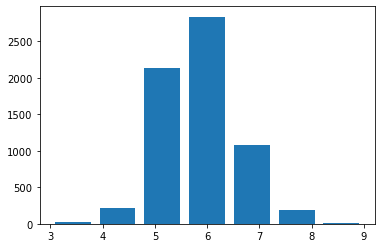

In [5]:
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

#### 품질을 3개의 범주로 재분류
* 나쁨 : 3~5
* 보통 : 6
* 좋음 : 7~9

In [6]:
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

#### 변경된 품질 데이터 확인(new_quality)
* describe() : 통계 정보
* value_counts() : 항목 갯수
* 각 항목의 수가 너무 작거나 너무 많으면 분류가 잘 안되기 때문에 어느정도 비슷하게 데이터 양을 맞춰줘야 한다. 

In [7]:
print(wine['new_quality'].describe(), '\n')      
print(wine['new_quality'].value_counts())        

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64 

1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


#### 데이터 정규화하고 numpy로 변경하기 
* 정규화 : (데이터 - 데이터.min()) / (데이터.max() - 데이터.min())
* sample() 함수 : 전체 데이터프레임에서 frac 인수로 지정된 비율만큼 행을 랜덤하게 뽑아서 새로운 데이터프레임 생성
* to_numpy() : 데이터프레임을 넘파이로 변경

In [8]:
if 'quality' in wine :        # 해당 컬럼이 데이터프레임에 존재하는 확인
    del wine['quality']
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
print(wine_shuffle.head())     # 셔플 확인 
wine_np = wine_shuffle.to_numpy()
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1591       0.214876          0.026667     0.295181        0.088957   0.054817   
2123       0.247934          0.113333     0.162651        0.154908   0.111296   
721        0.421488          0.266667     0.144578        0.034509   0.141196   
2496       0.396694          0.100000     0.150602        0.164110   0.036545   
2512       0.148760          0.063333     0.174699        0.003067   0.056478   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
1591             0.166667              0.357143  0.142472  0.480620   
2123             0.159722              0.341014  0.184885  0.255814   
721              0.118056              0.230415  0.213804  0.294574   
2496             0.041667              0.207373  0.180066  0.302326   
2512             0.065972              0.140553  0.077309  0.434109   

      sulphates   alcohol  new_quality  
1591   0.123596  0.347826          0.5  
2123

#### train 데이터와 test 데이터로 분리
* 전체의 80% : 20% 로 분리 

In [9]:
train_idx = int(len(wine_np) * 0.8)
train_idx

5197

* 훈련 데이터와 학습 데이터로 분리 
* to_categorical() : 결과 데이터는 원-핫-인코딩으로 표현
* num_classes : 분류할 클래스 갯수 --> 해당 갯수만큼 원-핫으로 인코딩이 이루어진다. ex> 2= [0 1], 3= [0 0 1] 

In [10]:
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
print(len(wine_np[0]))
print(train_X[1], '\n')
print(len(train_X[1]), '\n')
print(test_X[1], '\n')
print(test_Y[1], '\n')

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)
print(train_Y[1])
print(test_Y[0])

12
[0.24793388 0.11333333 0.1626506  0.15490798 0.11129568 0.15972222
 0.34101382 0.18488529 0.25581395 0.08988764 0.14492754] 

11 

[0.32231405 0.23333333 0.1686747  0.05981595 0.06146179 0.11111111
 0.22119816 0.09041835 0.34108527 0.19101124 0.60869565] 

1.0 

[1. 0. 0.]
[1. 0. 0.]


#### 와인 데이터셋 다항 분류 모델 생성
* 12개의 항목에 대해 처리하는 모델 
* 마지막 units=2 는 출력 결과가 2종류 0 / 1
* softmax : 활성화 함수로 확률로 선택 
* softmax는 분류 문제나 언어 RNN에서 다음 토큰을 예측, 강화학습에서 에이전트의 행동 확률을 구하는 등 결과값으로 확률이 필요한 다양한 분야에 사용됨

In [11]:
tf.keras.backend.clear_session()

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(11, )),
     tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 39        
Total params: 2,091
Trainable params: 2,091
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 
* 손실함수로 categorial_crossentropy를 사용 
* Categorical Cross Entropy(CCE) : 모든 범주에 대해 평균을 계산함
* 정확도(accuracy) : 분류 문제는 정확도로 퍼포먼스를 측정하기 때문에 정확도를 설정하는 것이 필수 
* 학습시에 loss와 accuracy가 함께 저장됨 

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='categorical_crossentropy', metrics=['accuracy'])

#### 분류 모델 학습 
* validation_split : 훈련 데이터의 25% 정도를 검증 데이터로 사용
* 분류 모델에서는 loss: 0.0415 - accuracy: 0.9895 - val_loss: 0.0613 - val_accuracy: 0.9746 와 같이 학습 데이터의 accuracy와 검증 데이터의 val_accuracy가 같이 표시된다.

In [13]:
print(wine_shuffle.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        0.282257          0.173111     0.191948        0.074283   
std         0.107143          0.109758     0.087541        0.072972   
min         0.000000          0.000000     0.000000        0.000000   
25%         0.214876          0.100000     0.150602        0.018405   
50%         0.264463          0.140000     0.186747        0.036810   
75%         0.322314          0.213333     0.234940        0.115031   
max         1.000000          1.000000     1.000000        1.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.078129             0.102518              0.252868     0.146262   
std       0.058195             0.061630              0.130235     0.057811   
min       0.000000             0.000000         

In [14]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 218us/sample - loss: 0.4810 - accuracy: 0.7911 - val_loss: 0.4204 - val_accuracy: 0.8131
Epoch 2/25
3897/3897 [==============================] - 0s 78us/sample - loss: 0.4204 - accuracy: 0.8004 - val_loss: 0.4176 - val_accuracy: 0.8062
Epoch 3/25
3897/3897 [==============================] - 0s 76us/sample - loss: 0.4059 - accuracy: 0.8055 - val_loss: 0.4109 - val_accuracy: 0.8062
Epoch 4/25
3897/3897 [==============================] - 0s 76us/sample - loss: 0.4053 - accuracy: 0.8070 - val_loss: 0.4023 - val_accuracy: 0.8062
Epoch 5/25
3897/3897 [==============================] - 0s 76us/sample - loss: 0.4116 - accuracy: 0.8022 - val_loss: 0.4039 - val_accuracy: 0.8000
Epoch 6/25
3897/3897 [==============================] - 0s 74us/sample - loss: 0.4009 - accuracy: 0.8114 - val_loss: 0.4017 - val_accuracy: 0.8138
Epoch 7/25
3897/3897 [==============================] - 0s 101us/samp

#### 다항 분류 모델 학습 결과 시각화

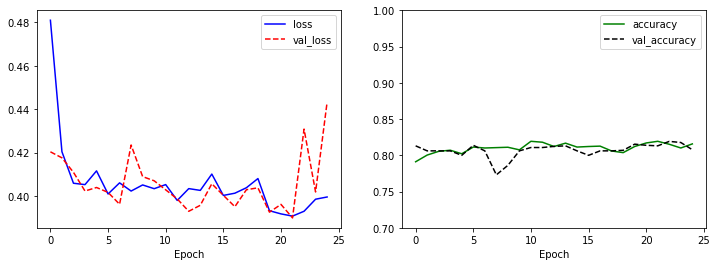

In [15]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

#### 분류 모델 평가

In [16]:
result = model.evaluate(test_X, test_Y)

1300/1300 [==============================] - 0s 45us/sample - loss: 0.4526 - accuracy: 0.8000


#### 분석 
* loss: 0.4938 - accuracy: 0.8068 - val_loss: 0.5015 - val_accuracy: 0.7992
* 정확도는 79.7% 정도로 검증 데이터의 정확도와 비슷하게 나온다. 
* 데이터의 구성이 균일하지 않았기 때문에 이러한 결과가 나온다. 
* 좋은 성과를 위해서는 네트워크의 크기를 키워보거나 학습률을 조성해보는 등의 시도가 필요함.